In [ ]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from keras.models import Model
from keras.utils import plot_model
from keras.models import Sequential
from keras.applications import VGG19
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
import tensorflow.keras.models as models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_path = '/content/drive/MyDrive/odir dataset/train'
test_path = '/content/drive/MyDrive/odir dataset/test'
label_train_path ='/content/drive/MyDrive/dataset/train/_classes.csv'
label_test_path ='/content/drive/MyDrive/dataset/test/_classes.csv'

normal


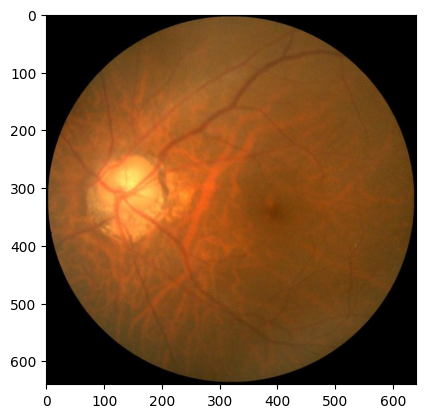

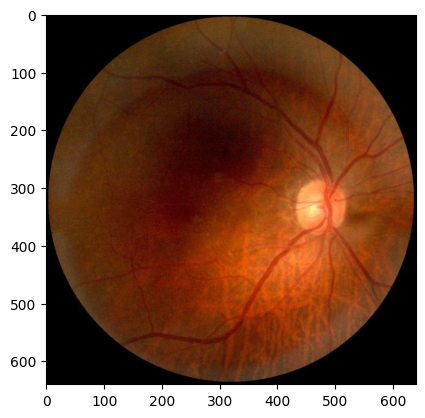

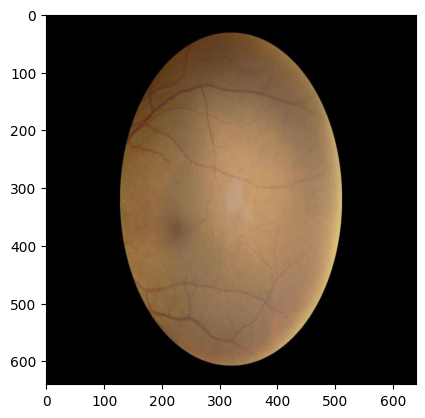

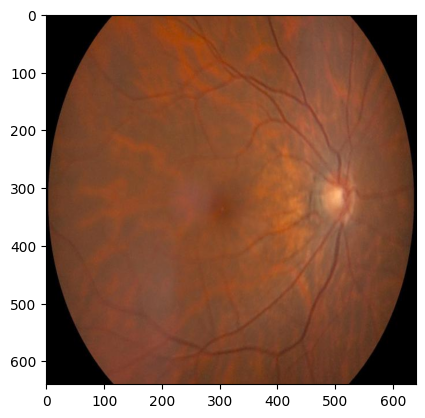

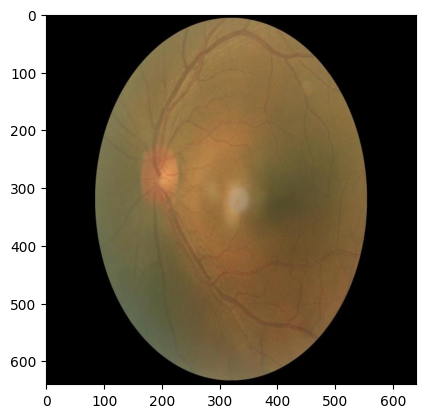

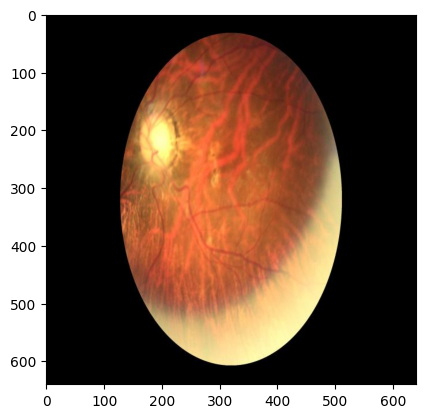

In [ ]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder

    print(folder)
    for i in range(6):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [ ]:
import pandas as pd

# Load the labels from the TRAIN CSV file
labels_df_train = pd.read_csv('/content/drive/MyDrive/dataset_small_80_20/train/_classes.csv')

# Count the number of images per class
class_counts = labels_df_train.iloc[:, 1:].sum()  # Sum the counts for each class column excluding the filename column

# Display the number of images per class
print("Number of images per class:")
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count} images")

total_images = class_counts.sum()
print(f"\nTotal number of images in the train dataset: {total_images}")

#______
# Load the labels from the TESTING CSV file
labels_df_test = pd.read_csv('/content/drive/MyDrive/dataset_small_80_20/test/_classes.csv')

# Count the number of images per class
class_counts = labels_df_test.iloc[:, 1:].sum()  # Sum the counts for each class column excluding the filename column

# Display the number of images per class
print("Number of images per class:")
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count} images")

total_images = class_counts.sum()
print(f"\nTotal number of images in the testing dataset: {total_images}")

Number of images per class:
Class  age related macular degeneration: 244 images
Class  cataract: 240 images
Class  diabetes: 229 images
Class  glaucoma: 240 images
Class  hypertension: 240 images
Class  normal: 234 images

Total number of images in the train dataset: 1427
Number of images per class:
Class  age related macular degeneration: 56 images
Class  cataract: 59 images
Class  diabetes: 63 images
Class  glaucoma: 60 images
Class  hypertension: 59 images
Class  normal: 66 images

Total number of images in the testing dataset: 363


In [ ]:
import pandas as pd
import os
# List contents of the directory to verify paths
train_images_path = '/content/drive/MyDrive/dataset_small_90_10/train/'
train_image_files = os.listdir(train_images_path)
print(train_image_files[:10])  # Print first 10 files to verify the file names

test_images_path = '/content/drive/MyDrive/dataset_small_90_10/test/'
test_image_files = os.listdir(test_images_path)
print(test_image_files[:10])  # Print first 10 files to verify the file names

digits_training_labels_file_path = "/content/drive/MyDrive/dataset_small_90_10/train/_classes.csv"  # Path to training labels
digits_testing_labels_file_path = "/content/drive/MyDrive/dataset_small_90_10/test/_classes.csv"  # Path to testing labels
training_digits_labels = pd.read_csv(digits_training_labels_file_path)
testing_digits_labels = pd.read_csv(digits_testing_labels_file_path)

['2828_right_jpg.rf.c063205db3ae88121d92ebbb91777ad6.jpg', 'image132_png.rf.bbc2aad994c26e690b9a5df6c01e81e9.jpg', 'image189_png.rf.47128cb45075b4479853b6529882900a.jpg', '2872_right_jpg.rf.e6c8d8bd4c9c2f7f17af342d24c50677.jpg', 'image180_png.rf.e5ddce745b82e938a632b4fe384bd26f.jpg', '2160_right_jpg.rf.4bd68cbba45dcce57e3abe59e598bca7.jpg', '1022_left_jpg.rf.6d1fa3f20fd6d91787398441dcdbe897.jpg', '1942_right_jpg.rf.72145b6bb49ba4d21a70134574d5276e.jpg', '2118_right_jpg.rf.c24645534aa7f1f1a011e2ce67f25441.jpg', '_7_6905968_jpg.rf.bd59984339e0b7811c03fd9012631f2f.jpg']
['image64_png.rf.141e0c7a793271f20e8fa45a324dffdf.jpg', 'image97_png.rf.284a2bb9f0104b3cd8d9876d358c8e91.jpg', 'image6_png.rf.21b88d7351e131c263515cb6819dba6f.jpg', 'image159_png.rf.0bd8536985331a3b25a76fa8237c7d89.jpg', '_14_8919522_jpg.rf.270dd079a6942c282440f17d82994c04.jpg', 'image81_png.rf.1b0f43ee916cc8931be5478afea66feb.jpg', '_12_5656283_jpg.rf.1ad3aa2f8d5b55e5501aafcbc8db44fd.jpg', '1048_left_jpg.rf.323bd52c683232

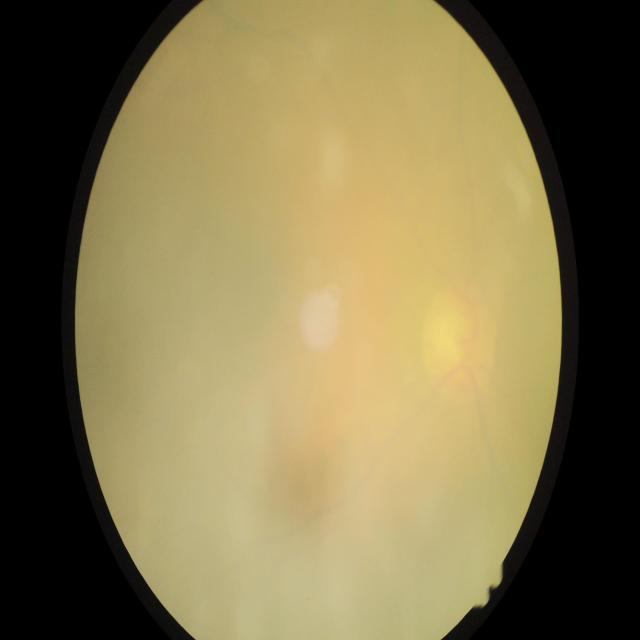

In [ ]:
from PIL import Image
import os

# Path to a sample image in the training directory
sample_train_image_path = os.path.join(train_images_path, train_image_files[11])

# Load the sample image
sample_image = Image.open(sample_train_image_path)
# Display the image
display(sample_image)


In [ ]:
import pandas as pd
import os

# Training digits images and labels files
digits_training_images_file_path = "/content/drive/MyDrive/dataset_small_90_10/train"  # Path to images for training(have 640 images)
digits_training_labels_file_path = "/content/drive/MyDrive/dataset_small_90_10/train/_classes.csv"  # Path to training labels

# Testing digits images and labels files
digits_testing_images_file_path = "/content/drive/MyDrive/dataset_small_90_10/test"  # Path to images for testing(have 160 images)
digits_testing_labels_file_path = "/content/drive/MyDrive/dataset_small_90_10/test/_classes.csv"  # Path to testing labels

# Loading dataset into dataframes
training_digits_images = pd.DataFrame(os.listdir(digits_training_images_file_path))  # Assuming image names are used as the data
training_digits_labels = pd.read_csv(digits_training_labels_file_path)

testing_digits_images = pd.DataFrame(os.listdir(digits_testing_images_file_path))  # Assuming image names are used as the data
testing_digits_labels = pd.read_csv(digits_testing_labels_file_path)

# Checking the shapes or sample data to ensure successful loading
print("Training images shape:", training_digits_images.shape)
print("Training labels shape:", training_digits_labels.shape)
print("Testing images shape:", testing_digits_images.shape)
print("Testing labels shape:", testing_digits_labels.shape)


# print statistics about the dataset
print("\nThere are %d training mushroom images." %training_digits_images.shape[0])
print("There are %d testing mushroom images." %testing_digits_images.shape[0])

training_digits_labels.head()

Training images shape: (1587, 1)
Training labels shape: (1586, 7)
Testing images shape: (176, 1)
Testing labels shape: (175, 7)

There are 1587 training mushroom images.
There are 176 testing mushroom images.


,filename,age related macular degeneration,cataract,diabetes,glaucoma,hypertension,normal
0,2465_left_jpg.rf.fe81212a7fa591ccb3d2483bfa140...,0,0,0,0,0,1
1,image192_png.rf.fdf5a7d7175aceac5e1578ed1c5150...,0,0,0,1,0,0
2,603_right_jpg.rf.fe0b8cbed2116c75ce9877ae40263...,1,0,0,0,0,0
3,image113_png.rf.fe39eb57173536621b9547e17c5ed3...,1,0,0,0,0,0
4,588_left_jpg.rf.ffe70ec9bf1166eecdeea1f04b17fb...,0,0,0,0,0,1


Displaying first 4 images from the training dataset:


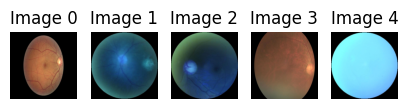

Displaying first 4 images from the testing dataset:


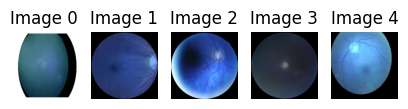

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Function to display images
def display_images(image_folder_path, image_names, num_images=5):
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        image_name = image_names.iloc[i, 0]
        image_path = os.path.join(image_folder_path, image_name)

        # Check if the file exists
        if os.path.isfile(image_path):
            # Read and display the image using OpenCV
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                plt.subplot(1, num_images, i + 1)
                plt.imshow(image)
                plt.title(f"Image {i + 0}")
                plt.axis('off')
            else:
                print(f"Error reading image: {image_name}")
        else:
            print(f"File not found: {image_path}")

    plt.show()

# Display first 4 images from the training dataset
print("Displaying first 4 images from the training dataset:")
display_images(digits_training_images_file_path, training_digits_images)

# Display first 4 images from the testing dataset
print("Displaying first 4 images from the testing dataset:")
display_images(digits_testing_images_file_path, testing_digits_images)


In [ ]:
import pandas as pd
import os

# Define the paths
data_path = '/content/drive/MyDrive/dataset_small_90_10'  # Path to the dataset folder
train_csv_path = os.path.join(data_path, 'train/_classes.csv')  # Path to the training labels CSV file
test_csv_path = os.path.join(data_path, 'test/_classes.csv')  # Path to the testing labels CSV file
images_folderTrain = '/content/drive/MyDrive/dataset_small_90_10/train'  # Path to the folder containing all images of train
images_folderTest = '/content/drive/MyDrive/dataset_small_90_10/test'  # Path to the folder containing all images of train


def load_labels(csv_path):
    labels_df = pd.read_csv(csv_path)
    return labels_df

# Load the labels for training and testing data
train_labels = load_labels(train_csv_path)
test_labels = load_labels(test_csv_path)

# Display the loaded labels to verify
print("Training labels:")
print(train_labels.head())

print("\nTesting labels:")
print(test_labels.head())




Training labels:
                                            filename  \
0  2465_left_jpg.rf.fe81212a7fa591ccb3d2483bfa140...   
1  image192_png.rf.fdf5a7d7175aceac5e1578ed1c5150...   
2  603_right_jpg.rf.fe0b8cbed2116c75ce9877ae40263...   
3  image113_png.rf.fe39eb57173536621b9547e17c5ed3...   
4  588_left_jpg.rf.ffe70ec9bf1166eecdeea1f04b17fb...   

    age related macular degeneration   cataract   diabetes   glaucoma  \
0                                  0          0          0          0   
1                                  0          0          0          1   
2                                  1          0          0          0   
3                                  1          0          0          0   
4                                  0          0          0          0   

    hypertension   normal  
0              0        1  
1              0        0  
2              0        0  
3              0        0  
4              0        1  

Testing labels:
                      

read dataset

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to load labels from a CSV file
def load_labels(csv_path):
    labels_df = pd.read_csv(csv_path)
    # Combine multiple columns into a single 'class' column
    labels_df['class'] = labels_df.iloc[:, 1:].idxmax(axis=1)
    return labels_df

train_csv_path = '/content/drive/MyDrive/dataset_small_80_20/train/_classes.csv'
test_csv_path = '/content/drive/MyDrive/dataset_small_80_20/test/_classes.csv'

# Load labels
train_data = load_labels(train_csv_path)
test_data = load_labels(test_csv_path)

# ImageDataGenerator configuration
datagen = ImageDataGenerator(rescale=1./255)

# Set up data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,  # Rotate images randomly by up to 20 degrees
    #width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    #height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    #shear_range=0.2,  # Shear transformations
    #zoom_range=0.2,  # Zoom inside images
    #horizontal_flip=True,  # Flip images horizontally
    #fill_mode='nearest',  # Fill in newly created pixels after rotation or width/height shift
    validation_split=0.2
)

# Train Data Generator with augmentation
train_generator_augmented = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/drive/MyDrive/dataset_small_80_20/train/',
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=25,
    class_mode='sparse',
    subset='training'
)

# Validation Data Generator
val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/drive/MyDrive/dataset_small_80_20/train/',
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=25,
    class_mode='sparse',
    subset='validation'
)


# Test Data Generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='/content/drive/MyDrive/dataset_small_80_20/test/',
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=25,
    class_mode='sparse',
    shuffle=False
)

Found 1122 validated image filenames belonging to 6 classes.
Found 280 validated image filenames belonging to 6 classes.
Found 359 validated image filenames belonging to 6 classes.


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to load labels from a CSV file
def load_labels(csv_path):
    labels_df = pd.read_csv(csv_path)
    # Combine multiple columns into a single 'class' column
    labels_df['class'] = labels_df.iloc[:, 1:].idxmax(axis=1)
    return labels_df

train_csv_dr = "/content/drive/MyDrive/dataset_mush/80:20/train/train/_classes.csv"
test_csv_dr = "/content/drive/MyDrive/dataset_mush/80:20/test/test/_classes.csv"

# Load labels
train_data = load_labels(train_csv_dr)
test_data = load_labels(test_csv_dr)

# ImageDataGenerator configuration
datagen = ImageDataGenerator(rescale=1./255)

# Set up data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255, #(takyah buat kalau tak perlu augmentation),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

# Train Data Generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/drive/MyDrive/dataset_mush/80:20/train/train',
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=25,
    class_mode='sparse',
    subset='training'
)

# Validation Data Generator
val_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/drive/MyDrive/dataset_mush/80:20/train/train',
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=25,
    class_mode='sparse',
    subset='validation'
)


# Test Data Generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='/content/drive/MyDrive/dataset_mush/80:20/test/test/',
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=25,
    class_mode='sparse',
    shuffle=False
)

FileNotFoundError: ignored

CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(128, activation='relu'))

# Output layer with appropriate number of neurons and activation function
model.add(Dense(6, activation='softmax'))  # number of classes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=10, #tukar epochs
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


# Evaluate the model on the test dataset
steps = len(test_generator)
test_loss, test_accuracy = model.evaluate(test_generator, steps=steps)

print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get true labels
true_labels = test_generator.classes

# Calculate F1 score for multiclass classification
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 score: {f1}")


# Compute the standard deviation between predicted_classes and true_labels
std_dev = np.std(predicted_classes == true_labels)
print(f"Standard Deviation: {std_dev}")

Epoch 1/10
51/51 [==============================] - 12s 193ms/step - loss: 1.3002 - accuracy: 0.4775 - val_loss: 1.2081 - val_accuracy: 0.5268
Epoch 2/10
51/51 [==============================] - 9s 173ms/step - loss: 1.2729 - accuracy: 0.4831 - val_loss: 1.1674 - val_accuracy: 0.5331
Epoch 3/10
51/51 [==============================] - 10s 192ms/step - loss: 1.2521 - accuracy: 0.4941 - val_loss: 1.1752 - val_accuracy: 0.5268
Epoch 4/10
51/51 [==============================] - 10s 188ms/step - loss: 1.2049 - accuracy: 0.5453 - val_loss: 1.2146 - val_accuracy: 0.4858
Epoch 5/10
51/51 [==============================] - 9s 173ms/step - loss: 1.2065 - accuracy: 0.5201 - val_loss: 1.1379 - val_accuracy: 0.5268
Epoch 6/10
51/51 [==============================] - 10s 194ms/step - loss: 1.1719 - accuracy: 0.5335 - val_loss: 1.1465 - val_accuracy: 0.5394
Epoch 7/10
51/51 [==============================] - 10s 192ms/step - loss: 1.1640 - accuracy: 0.5540 - val_loss: 1.1249 - val_accuracy: 0.5426
E

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate Precision, Recall, and F1-Score
report = classification_report(true_classes, predicted_classes)
print(report)

7/7 [==============================] - 1s 133ms/step
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        48
           1       0.56      0.43      0.49        23
           2       0.36      1.00      0.53         5
           3       0.69      0.47      0.56        53
           4       0.95      0.85      0.90        41
           5       0.00      0.00      0.00         5

    accuracy                           0.69       175
   macro avg       0.54      0.62      0.55       175
weighted avg       0.71      0.69      0.68       175



In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get true labels
true_labels = test_generator.classes

# Calculate F1 score for multiclass classification
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 score: {f1}")


# Compute the standard deviation between predicted_classes and true_labels
std_dev = np.std(predicted_classes == true_labels)
print(f"Standard Deviation: {std_dev}")



7/7 [==============================] - 1s 140ms/step
F1 score: 0.6799581280438123
Standard Deviation: 0.4642307659791977


7/7 [==============================] - 1s 133ms/step


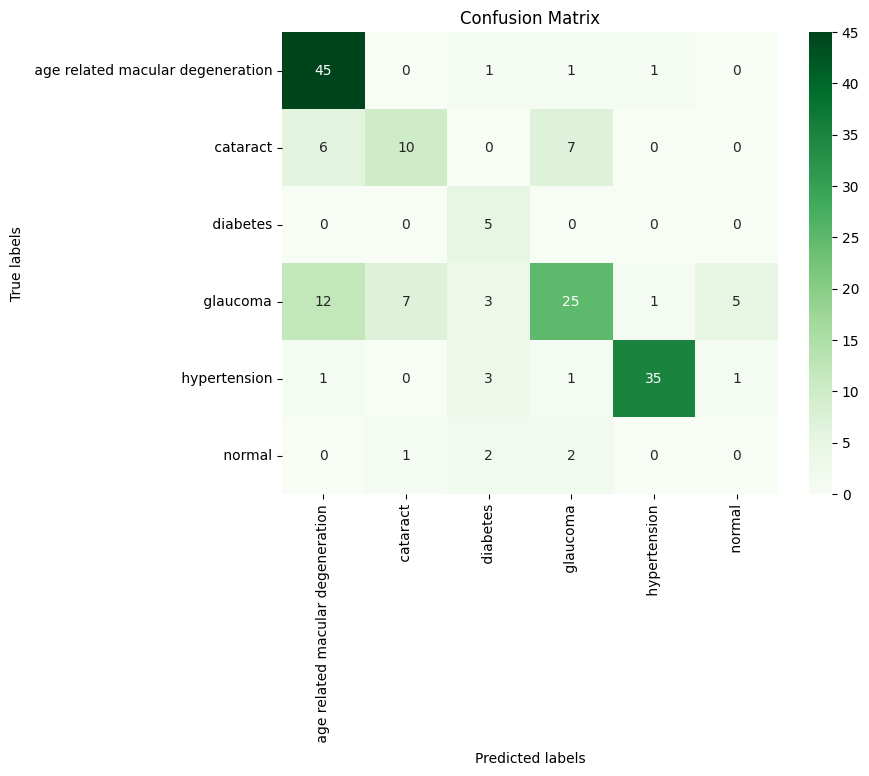

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


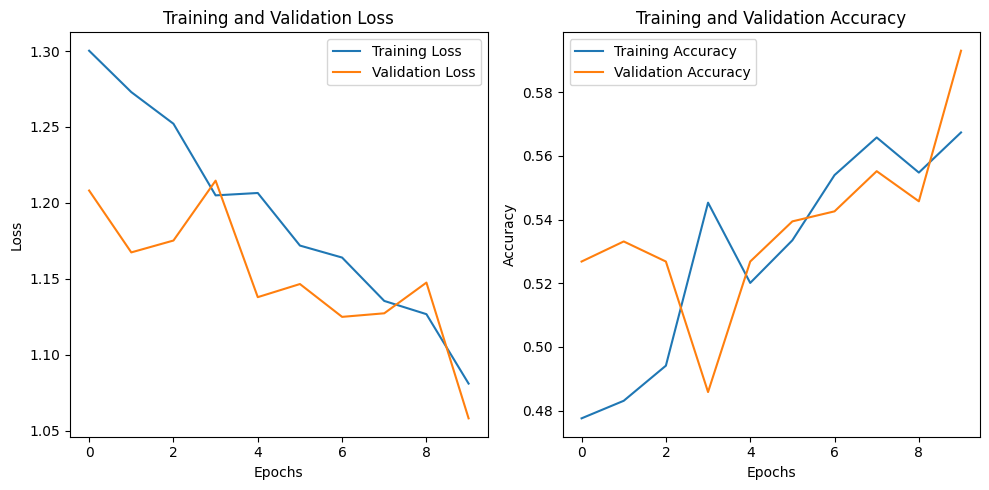

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers by level
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG19 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Assuming 10 classes

model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 23236550 (88.64 MB)
Trainable params: 3212166 (12.25 MB)
Non-trainable params: 20024384 (76.39 MB)
__________

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=10, #tukar epochs
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


# Evaluate the model on the test dataset
steps = len(test_generator)
test_loss, test_accuracy = model.evaluate(test_generator, steps=steps)

print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get true labels
true_labels = test_generator.classes

# Calculate F1 score for multiclass classification
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 score: {f1}")


# Compute the standard deviation between predicted_classes and true_labels
std_dev = np.std(predicted_classes == true_labels)
print(f"Standard Deviation: {std_dev}")

Epoch 1/10
51/51 [==============================] - 17s 268ms/step - loss: 1.2607 - accuracy: 0.5225 - val_loss: 1.1891 - val_accuracy: 0.5584
Epoch 2/10
51/51 [==============================] - 13s 250ms/step - loss: 1.2093 - accuracy: 0.5351 - val_loss: 1.1878 - val_accuracy: 0.5615
Epoch 3/10
51/51 [==============================] - 10s 185ms/step - loss: 1.2231 - accuracy: 0.5343 - val_loss: 1.1578 - val_accuracy: 0.5521
Epoch 4/10
51/51 [==============================] - 10s 188ms/step - loss: 1.1878 - accuracy: 0.5225 - val_loss: 1.1468 - val_accuracy: 0.5741
Epoch 5/10
51/51 [==============================] - 10s 186ms/step - loss: 1.1929 - accuracy: 0.5390 - val_loss: 1.1487 - val_accuracy: 0.5710
Epoch 6/10
51/51 [==============================] - 9s 185ms/step - loss: 1.1488 - accuracy: 0.5571 - val_loss: 1.1218 - val_accuracy: 0.5489
Epoch 7/10
51/51 [==============================] - 10s 187ms/step - loss: 1.1627 - accuracy: 0.5477 - val_loss: 1.1110 - val_accuracy: 0.5868


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate Precision, Recall, and F1-Score
report = classification_report(true_classes, predicted_classes,zero_division=1)
print(report)

7/7 [==============================] - 1s 187ms/step
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        48
           1       0.63      0.83      0.72        23
           2       0.31      1.00      0.48         5
           3       1.00      0.34      0.51        53
           4       0.85      0.85      0.85        41
           5       0.17      0.40      0.24         5

    accuracy                           0.68       175
   macro avg       0.61      0.71      0.59       175
weighted avg       0.79      0.68      0.68       175



7/7 [==============================] - 1s 172ms/step


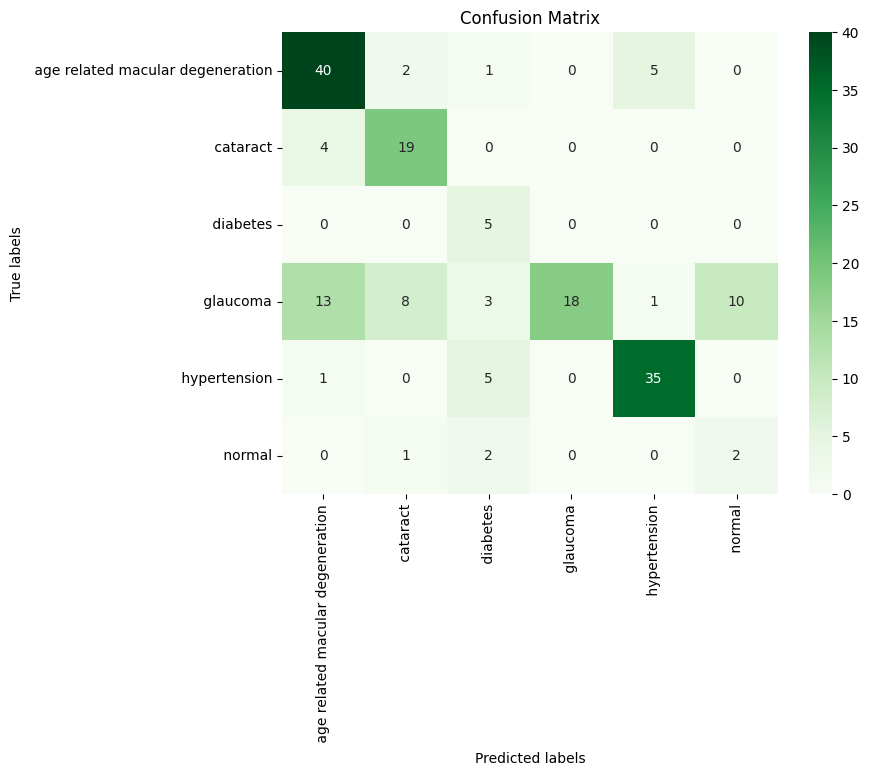

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


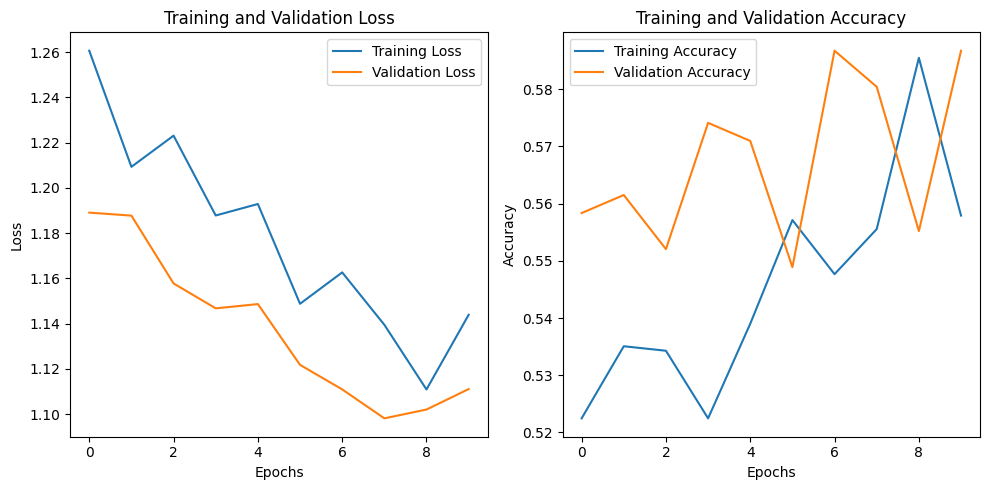

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/dataset_small_90_10/my_model.keras')

VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the VGG16 model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers by level
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base model
model_vgg16 = Sequential()
model_vgg16.add(base_model_vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(6, activation='softmax'))  # Assuming 10 classes

model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 17926854 (68.39 MB)
Trainable params: 3212166 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_vgg16.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=25, #tukar epochs
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


# Evaluate the model on the test dataset
steps = len(test_generator)
test_loss, test_accuracy = model_vgg16.evaluate(test_generator, steps=steps)

print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# Get predictions on the test set
predictions = model_vgg16.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get true labels
true_labels = test_generator.classes

# Calculate F1 score for multiclass classification
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 score: {f1}")


# Compute the standard deviation between predicted_classes and true_labels
std_dev = np.std(predicted_classes == true_labels)
print(f"Standard Deviation: {std_dev}")

Epoch 1/25
45/45 [==============================] - 16s 318ms/step - loss: 0.8555 - accuracy: 0.6747 - val_loss: 1.0181 - val_accuracy: 0.5893
Epoch 2/25
45/45 [==============================] - 10s 214ms/step - loss: 0.8365 - accuracy: 0.6649 - val_loss: 0.9963 - val_accuracy: 0.6286
Epoch 3/25
45/45 [==============================] - 8s 176ms/step - loss: 0.8273 - accuracy: 0.6872 - val_loss: 0.9905 - val_accuracy: 0.5929
Epoch 4/25
45/45 [==============================] - 9s 195ms/step - loss: 0.8327 - accuracy: 0.6738 - val_loss: 0.9961 - val_accuracy: 0.5964
Epoch 5/25
45/45 [==============================] - 9s 199ms/step - loss: 0.8022 - accuracy: 0.6961 - val_loss: 0.9774 - val_accuracy: 0.6357
Epoch 6/25
45/45 [==============================] - 8s 182ms/step - loss: 0.7950 - accuracy: 0.6898 - val_loss: 1.0016 - val_accuracy: 0.5964
Epoch 7/25
45/45 [==============================] - 9s 193ms/step - loss: 0.7976 - accuracy: 0.6952 - val_loss: 0.9830 - val_accuracy: 0.6286
Epoc

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model_vgg16.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate Precision, Recall, and F1-Score
report = classification_report(true_classes, predicted_classes,zero_division=1)
print(report)

15/15 [==============================] - 2s 135ms/step
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        56
           1       0.75      0.90      0.82        59
           2       0.44      0.11      0.18        63
           3       0.66      0.67      0.66        60
           4       0.75      0.73      0.74        55
           5       0.39      0.59      0.47        66

    accuracy                           0.62       359
   macro avg       0.63      0.63      0.61       359
weighted avg       0.62      0.62      0.60       359



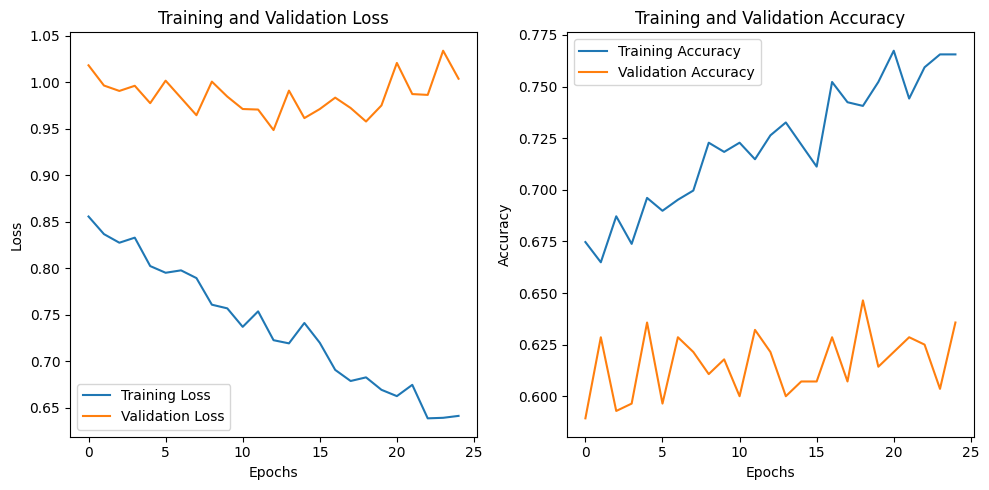

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

15/15 [==============================] - 2s 132ms/step


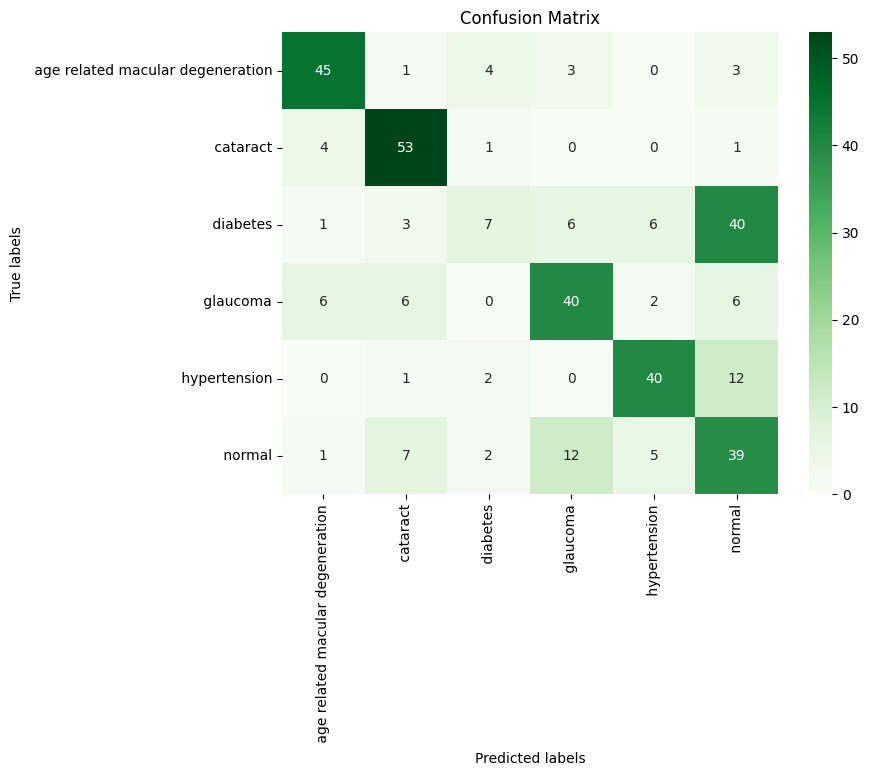

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model_vgg16.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


ResNet34

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Function to load labels from a CSV file
def load_labels(csv_path):
    labels_df = pd.read_csv(csv_path)
    labels_df['class'] = labels_df.iloc[:, 1:].idxmax(axis=1)
    return labels_df

# Define the ResNet block
def resnet_block(x, filters, kernel_size=3, strides=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define ResNet34 architecture
def ResNet34(input_shape, num_classes):
    input = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x = resnet_block(x, 64)
    # Add more resnet blocks here if needed

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=x)
    return model

# ResNet34 model creation
input_shape = (224, 224, 3)  # Adjust according to your image size
num_classes = 6  # Change this to your number of classes
resnet34_model = ResNet34(input_shape, num_classes)
resnet34_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 112, 112, 64)         9472      ['input_9[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d_6[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0][0

In [ ]:
# Adjusted optimizer and compile the model
new_learning_rate = 0.0001
new_optimizer = Adam(learning_rate=new_learning_rate)
resnet34_model.compile(optimizer=new_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = resnet34_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = resnet34_model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

Epoch 1/10
33/33 [==============================] - 10s 159ms/step - loss: 1.7985 - accuracy: 0.2754 - val_loss: 1.7842 - val_accuracy: 0.2036
Epoch 2/10
33/33 [==============================] - 7s 221ms/step - loss: 1.5932 - accuracy: 0.3512 - val_loss: 1.7891 - val_accuracy: 0.1857
Epoch 3/10
33/33 [==============================] - 5s 159ms/step - loss: 1.5301 - accuracy: 0.3975 - val_loss: 1.7813 - val_accuracy: 0.1643
Epoch 4/10
33/33 [==============================] - 6s 168ms/step - loss: 1.4995 - accuracy: 0.4234 - val_loss: 1.7939 - val_accuracy: 0.1607
Epoch 5/10
33/33 [==============================] - 5s 156ms/step - loss: 1.4738 - accuracy: 0.3948 - val_loss: 1.8356 - val_accuracy: 0.1643
Epoch 6/10
33/33 [==============================] - 6s 188ms/step - loss: 1.4399 - accuracy: 0.4269 - val_loss: 1.8813 - val_accuracy: 0.1643
Epoch 7/10
33/33 [==============================] - 6s 167ms/step - loss: 1.4239 - accuracy: 0.4394 - val_loss: 1.9693 - val_accuracy: 0.2000
Epoch

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = resnet34_model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate Precision, Recall, F1-Score, and Support
report = classification_report(true_classes, predicted_classes,zero_division=1)
print(report)


11/11 [==============================] - 1s 122ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        56
           1       0.16      1.00      0.28        59
           2       1.00      0.00      0.00        63
           3       1.00      0.00      0.00        60
           4       1.00      0.00      0.00        55
           5       1.00      0.00      0.00        66

    accuracy                           0.16       359
   macro avg       0.86      0.17      0.05       359
weighted avg       0.86      0.16      0.05       359



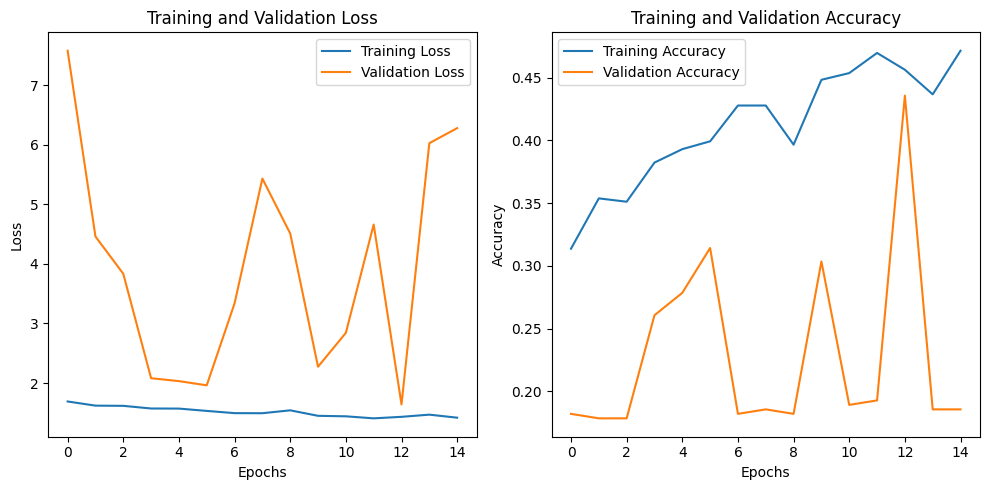

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

11/11 [==============================] - 1s 121ms/step


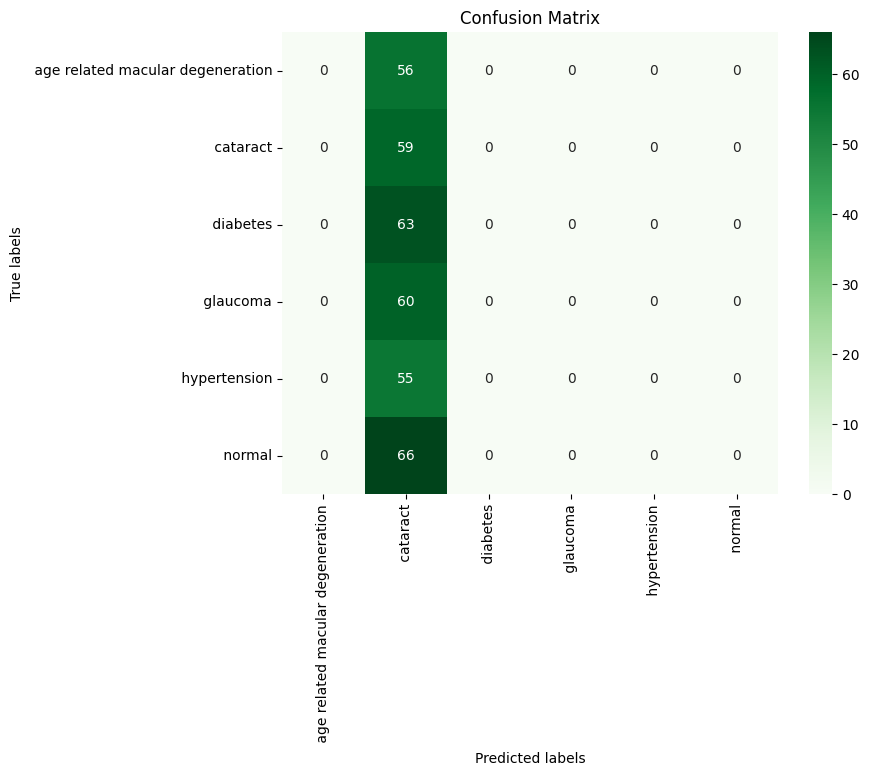

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = resnet34_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the ResNet50 model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers by level
for layer in resnet50_model.layers:
    layer.trainable = False

# Create a new model on top of the ResNet50 base model
model = Sequential()
model.add(resnet50_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Assuming num_classes is your number of classes

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_25 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 6)                 774       
                                                                 
Total params: 36433670 (138.98 MB)
Trainable params: 12845958 (49.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=15, #tukar epochs
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


# Evaluate the model on the test dataset
steps = len(test_generator)
test_loss, test_accuracy = model.evaluate(test_generator, steps=steps)

print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get true labels
true_labels = test_generator.classes

# Calculate F1 score for multiclass classification
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 score: {f1}")


# Compute the standard deviation between predicted_classes and true_labels
std_dev = np.std(predicted_classes == true_labels)
print(f"Standard Deviation: {std_dev}")

Epoch 1/15
45/45 [==============================] - 14s 158ms/step - loss: 1.7820 - accuracy: 0.1818 - val_loss: 1.7635 - val_accuracy: 0.1786
Epoch 2/15
45/45 [==============================] - 7s 160ms/step - loss: 1.7675 - accuracy: 0.1979 - val_loss: 1.7567 - val_accuracy: 0.1714
Epoch 3/15
45/45 [==============================] - 6s 140ms/step - loss: 1.7587 - accuracy: 0.2068 - val_loss: 1.7578 - val_accuracy: 0.2857
Epoch 4/15
45/45 [==============================] - 8s 173ms/step - loss: 1.7589 - accuracy: 0.2068 - val_loss: 1.7438 - val_accuracy: 0.2607
Epoch 5/15
45/45 [==============================] - 6s 135ms/step - loss: 1.7569 - accuracy: 0.2014 - val_loss: 1.7430 - val_accuracy: 0.2679
Epoch 6/15
45/45 [==============================] - 8s 172ms/step - loss: 1.7601 - accuracy: 0.1979 - val_loss: 1.7372 - val_accuracy: 0.2964
Epoch 7/15
45/45 [==============================] - 6s 137ms/step - loss: 1.7648 - accuracy: 0.2014 - val_loss: 1.7415 - val_accuracy: 0.2750
Epoch

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate Precision, Recall, and F1-Score
report = classification_report(true_classes, predicted_classes,zero_division=1)
print(report)

15/15 [==============================] - 2s 104ms/step
              precision    recall  f1-score   support

           0       0.25      0.86      0.38        56
           1       1.00      0.00      0.00        59
           2       0.33      0.84      0.48        63
           3       0.50      0.02      0.03        60
           4       1.00      0.00      0.00        55
           5       0.00      0.00      0.00        66

    accuracy                           0.28       359
   macro avg       0.51      0.29      0.15       359
weighted avg       0.50      0.28      0.15       359



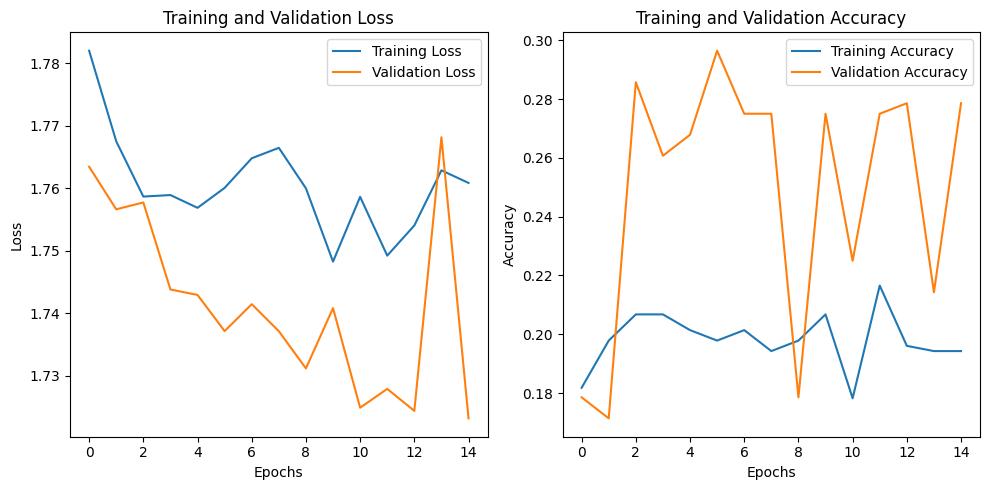

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

15/15 [==============================] - 2s 106ms/step


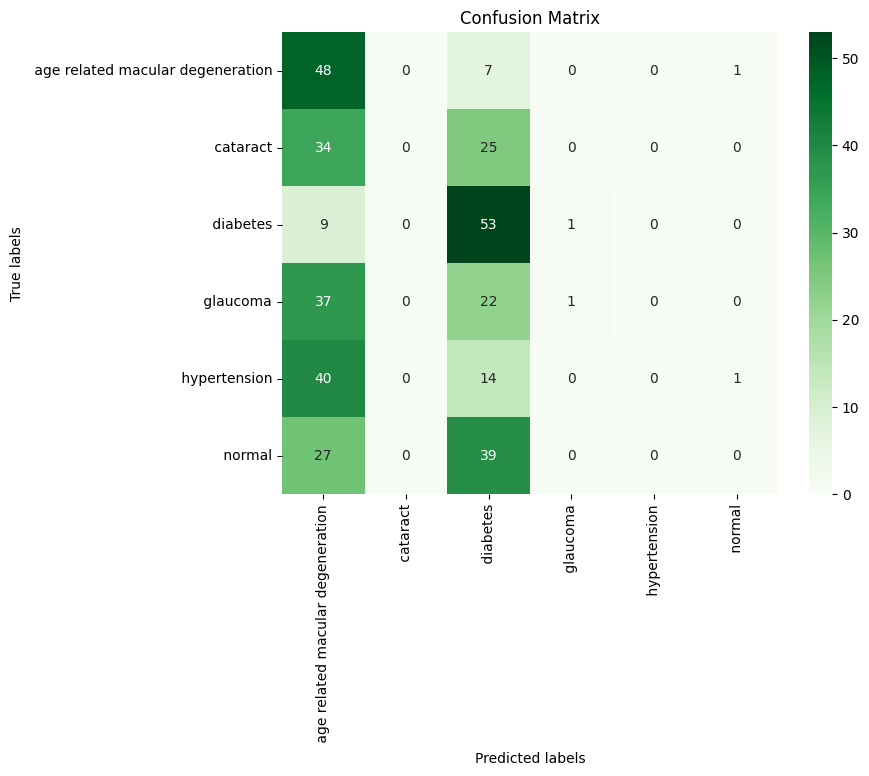

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Inception V3

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


# Create InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Build a custom model on top of InceptionV3
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming num_classes is your number of classes

model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Changed loss function

# Display the model summary
model.summary()

# Continue training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate on Test Data
test_results = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_results[1]:.4f}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dense_6 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 22328870 (85.18 MB)
Trainable params: 22294438 (85.05 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________
Model: "sequential_2"
____________________________________________________

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Get true labels
true_classes = test_generator.classes

# Calculate Precision, Recall, and F1-Score
report = classification_report(true_classes, predicted_classes,zero_division=1)
print(report)

5/5 [==============================] - 24s 5s/step
              precision    recall  f1-score   support

           0       0.85      0.35      0.50        48
           1       0.95      0.78      0.86        23
           2       0.33      0.40      0.36         5
           3       0.64      0.66      0.65        53
           4       0.69      0.83      0.76        41
           5       0.15      0.80      0.26         5

    accuracy                           0.63       175
   macro avg       0.60      0.64      0.56       175
weighted avg       0.73      0.63      0.64       175



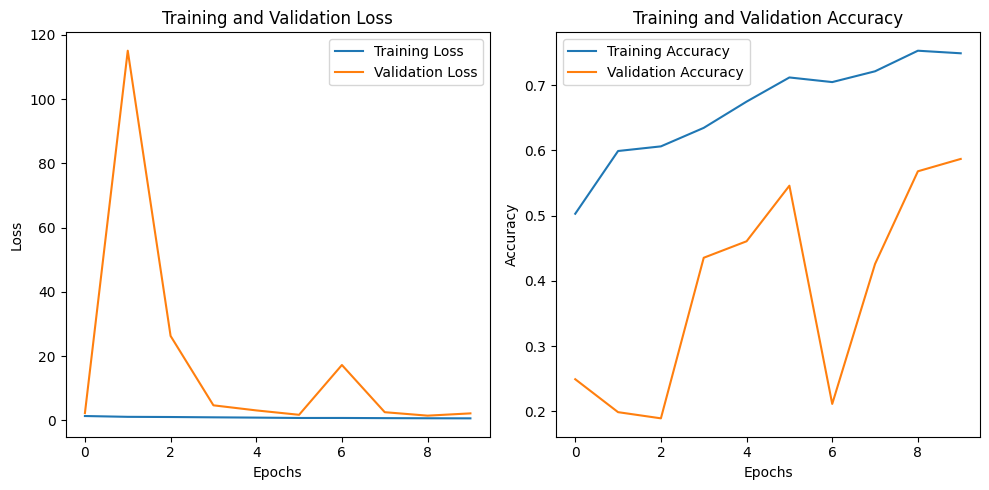

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

5/5 [==============================] - 22s 4s/step


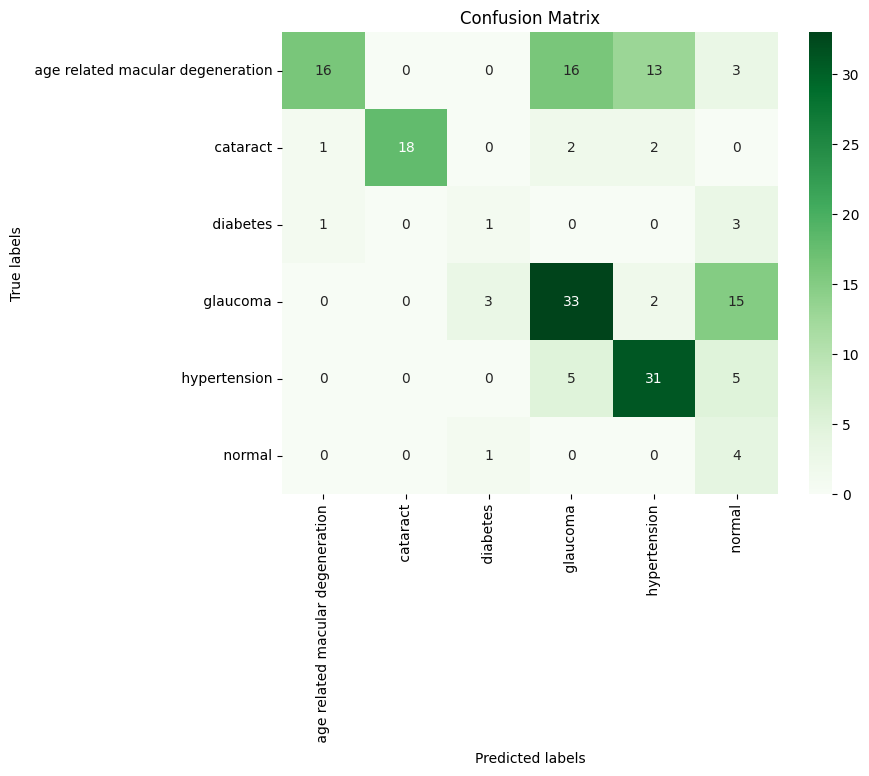

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
